In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import math
from functools import partial

import bases
import eigensolvers
import functionals
import generators
import representations
import reconstructions
import utils

# Order difference of calculation for $e^{ik\alpha}$ where $k \in \mathbb{Z}$ and $\alpha \in \mathbb{R}\setminus \mathbb{Q}$ 

In [26]:
def plot_functions(domain, Val, m, k, titles=[]):
    n_row = len(Val)
    n_col = 1
    fig, axs = plt.subplots(nrows=n_row, ncols=n_col, figsize=(16, 4*n_row))
    for idx in range(n_row):
        ax = axs[idx]
        ax.plot(domain, Val[idx].imag)
        if len(titles) == len(Val):
            ax.set_title(titles[idx])
        for i in range(2*m):
            ax.axvline( (2*i*np.pi/k + np.pi/k), color='r', linestyle='--')
            ax.axvline(-(2*i*np.pi/k + np.pi/k), color='r', linestyle='--')
    plt.show()

In [29]:
alpha = np.sqrt(2)
# alpha = 1/2
k = 4
e1 = lambda x: np.exp(1j*k*alpha*x)
e2 = lambda x: (np.exp(1j*alpha*x))**k
e3 = lambda x: (np.exp(1j*k*x))**alpha
def e4(x):
    theta = np.angle(np.exp(1j*k*x))
    np.where(theta<0, theta+2*np.pi, theta)
    theta *= alpha
    return np.cos(theta) + 1j*np.sin(theta)
def e5(x):
    theta = np.angle(np.exp(1j*k*x))
    np.where(theta<0, theta+2*np.pi, theta)
    theta *= alpha
    return np.exp(1j*theta)

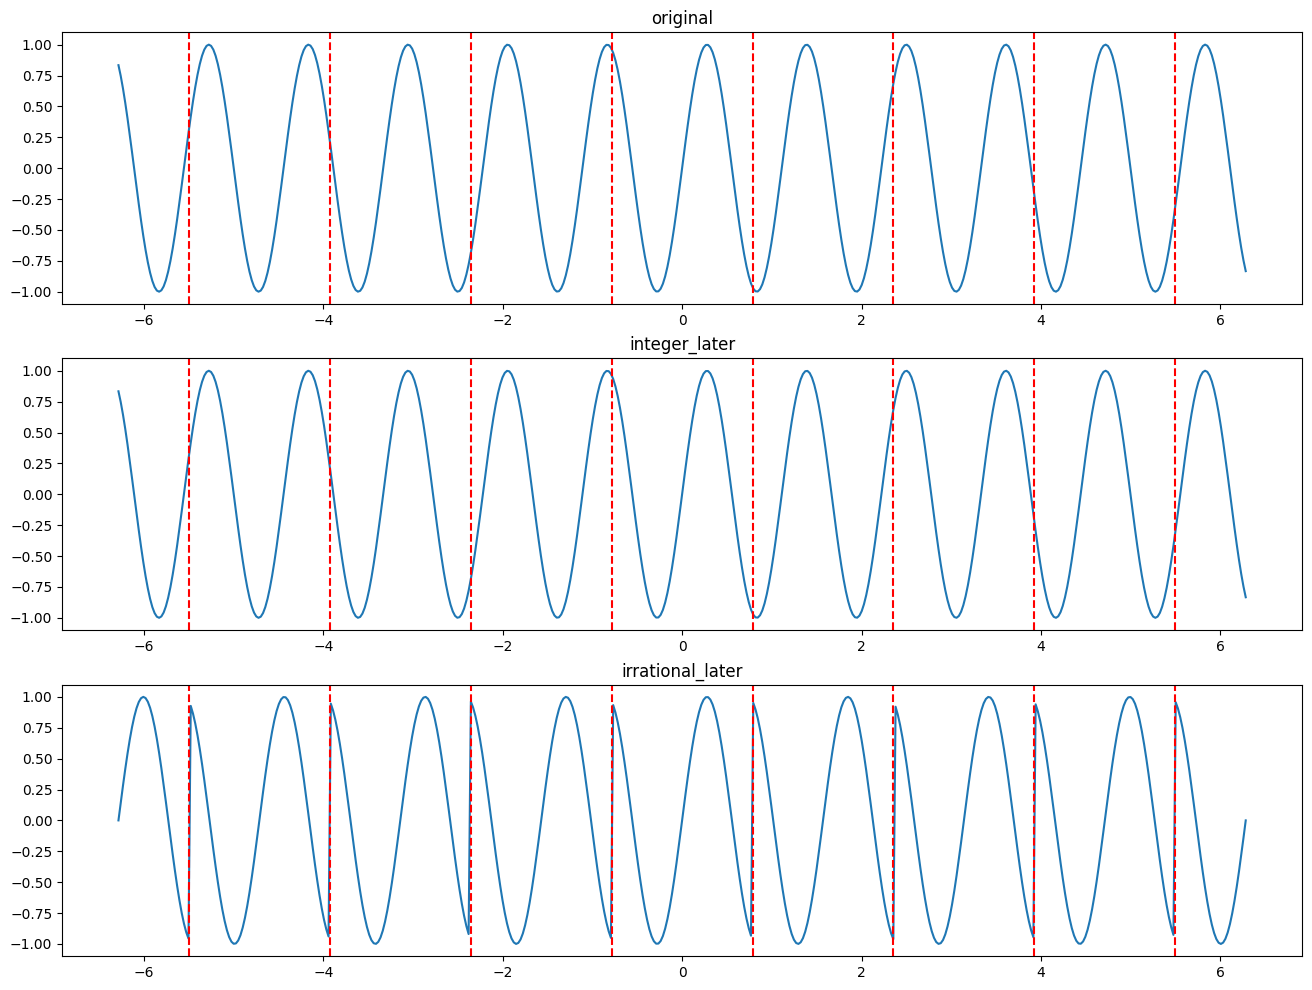

In [30]:
m = 2
domain = np.linspace(-m*np.pi, m*np.pi, num=500)
func_vals = [e1(domain), e2(domain), e3(domain)]  # , e4(domain), e5(domain)
plot_functions(domain, func_vals, m, k, titles=['original', 'integer_later', 'irrational_later'])

In [5]:
np.pi.as_integer_ratio()

(884279719003555, 281474976710656)

In [6]:
np.exp(1).as_integer_ratio()

(6121026514868073, 2251799813685248)

In [7]:
0.75.as_integer_ratio()

(3, 4)

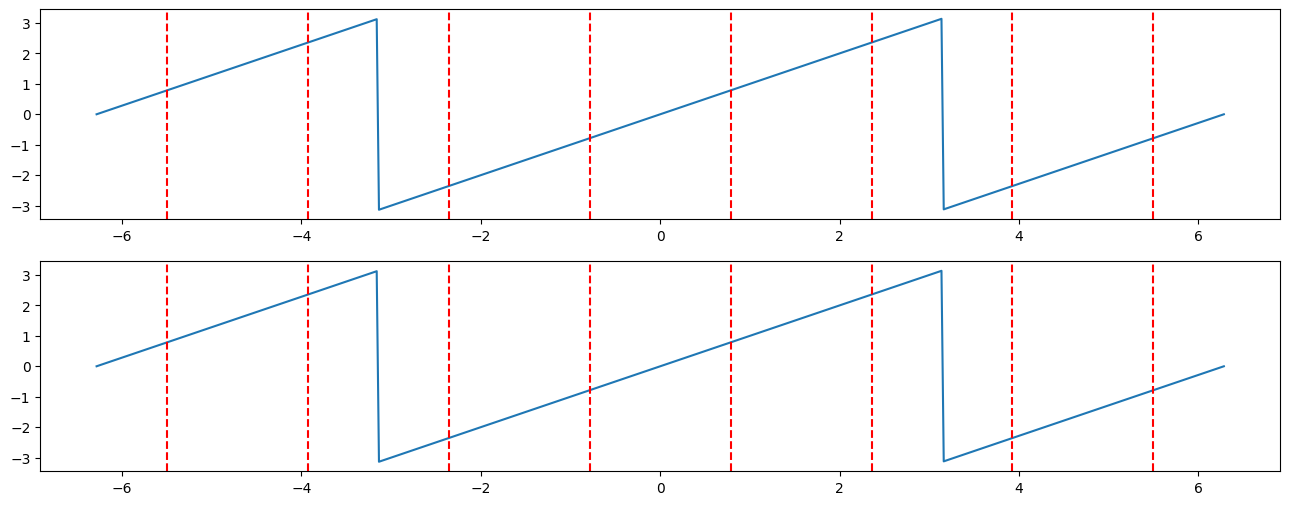

In [8]:
def mod(x):
    xm = x%(2*np.pi)
    return np.where(xm>np.pi, xm-2*np.pi, xm)
arc = lambda x: np.angle(np.exp(1j*x))
plot_functions(domain, [mod(domain), arc(domain)], m, k)

In [9]:
eps = 1e-15
print("+", np.angle(-(1-eps)+1j*eps))
print("0", np.angle(-1))
print("-", np.angle(-(1-eps)-1j*eps)+2*np.pi)

+ 3.1415926535897922
0 3.141592653589793
- 3.141592653589794


In [10]:
beta = np.sqrt(2)
print("+", pow(-(1-eps)+1j*eps, beta))
print("0", pow(-1+1j*0, beta))
print("-", pow(-(1-eps)-1j*eps, beta))

+ (-0.2662553420414161-0.9639025328498756j)
0 (-0.2662553420414156-0.9639025328498773j)
- (-0.2662553420414161+0.9639025328498756j)


In [11]:
print("+", np.exp(1j*np.angle(-(1-eps)+1j*eps)*beta))
print("0", np.exp(1j*np.angle(-1+0j)*beta))
print("-", np.exp(1j*(np.angle(-(1-eps)-1j*eps)+2*np.pi)*beta))

+ (-0.2662553420414165-0.963902532849877j)
0 (-0.2662553420414156-0.9639025328498773j)
- (-0.2662553420414139-0.9639025328498778j)
